In [4]:
import pandas as pd

# Load the datasets
iris_data = pd.read_csv(r'E:\data set\task-16\iris.csv')
wholesale_data = pd.read_csv(r'E:\data set\task-18\Wholesale_customers.csv')
iris_data.head()


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [5]:
wholesale_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Initial Exploratory Data Analysis (EDA)
Iris Dataset

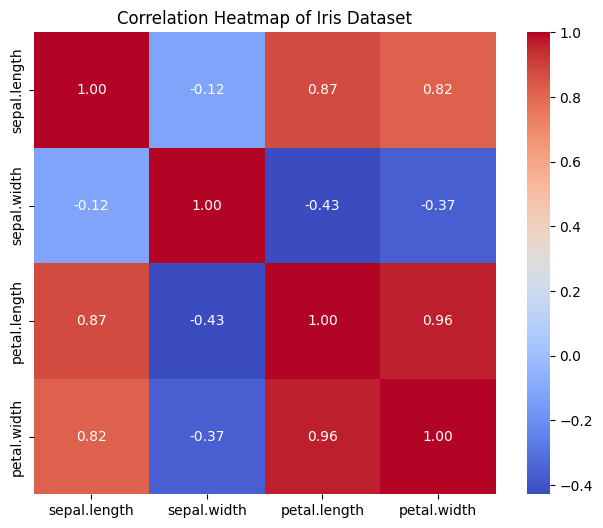

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already loaded the iris_data and wholesale_data as before

# Drop the non-numeric 'variety' column for the correlation matrix calculation
iris_corr = iris_data.drop(columns='variety').corr()

# Heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(iris_corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Correlation Heatmap of Iris Dataset")
plt.show()


          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.

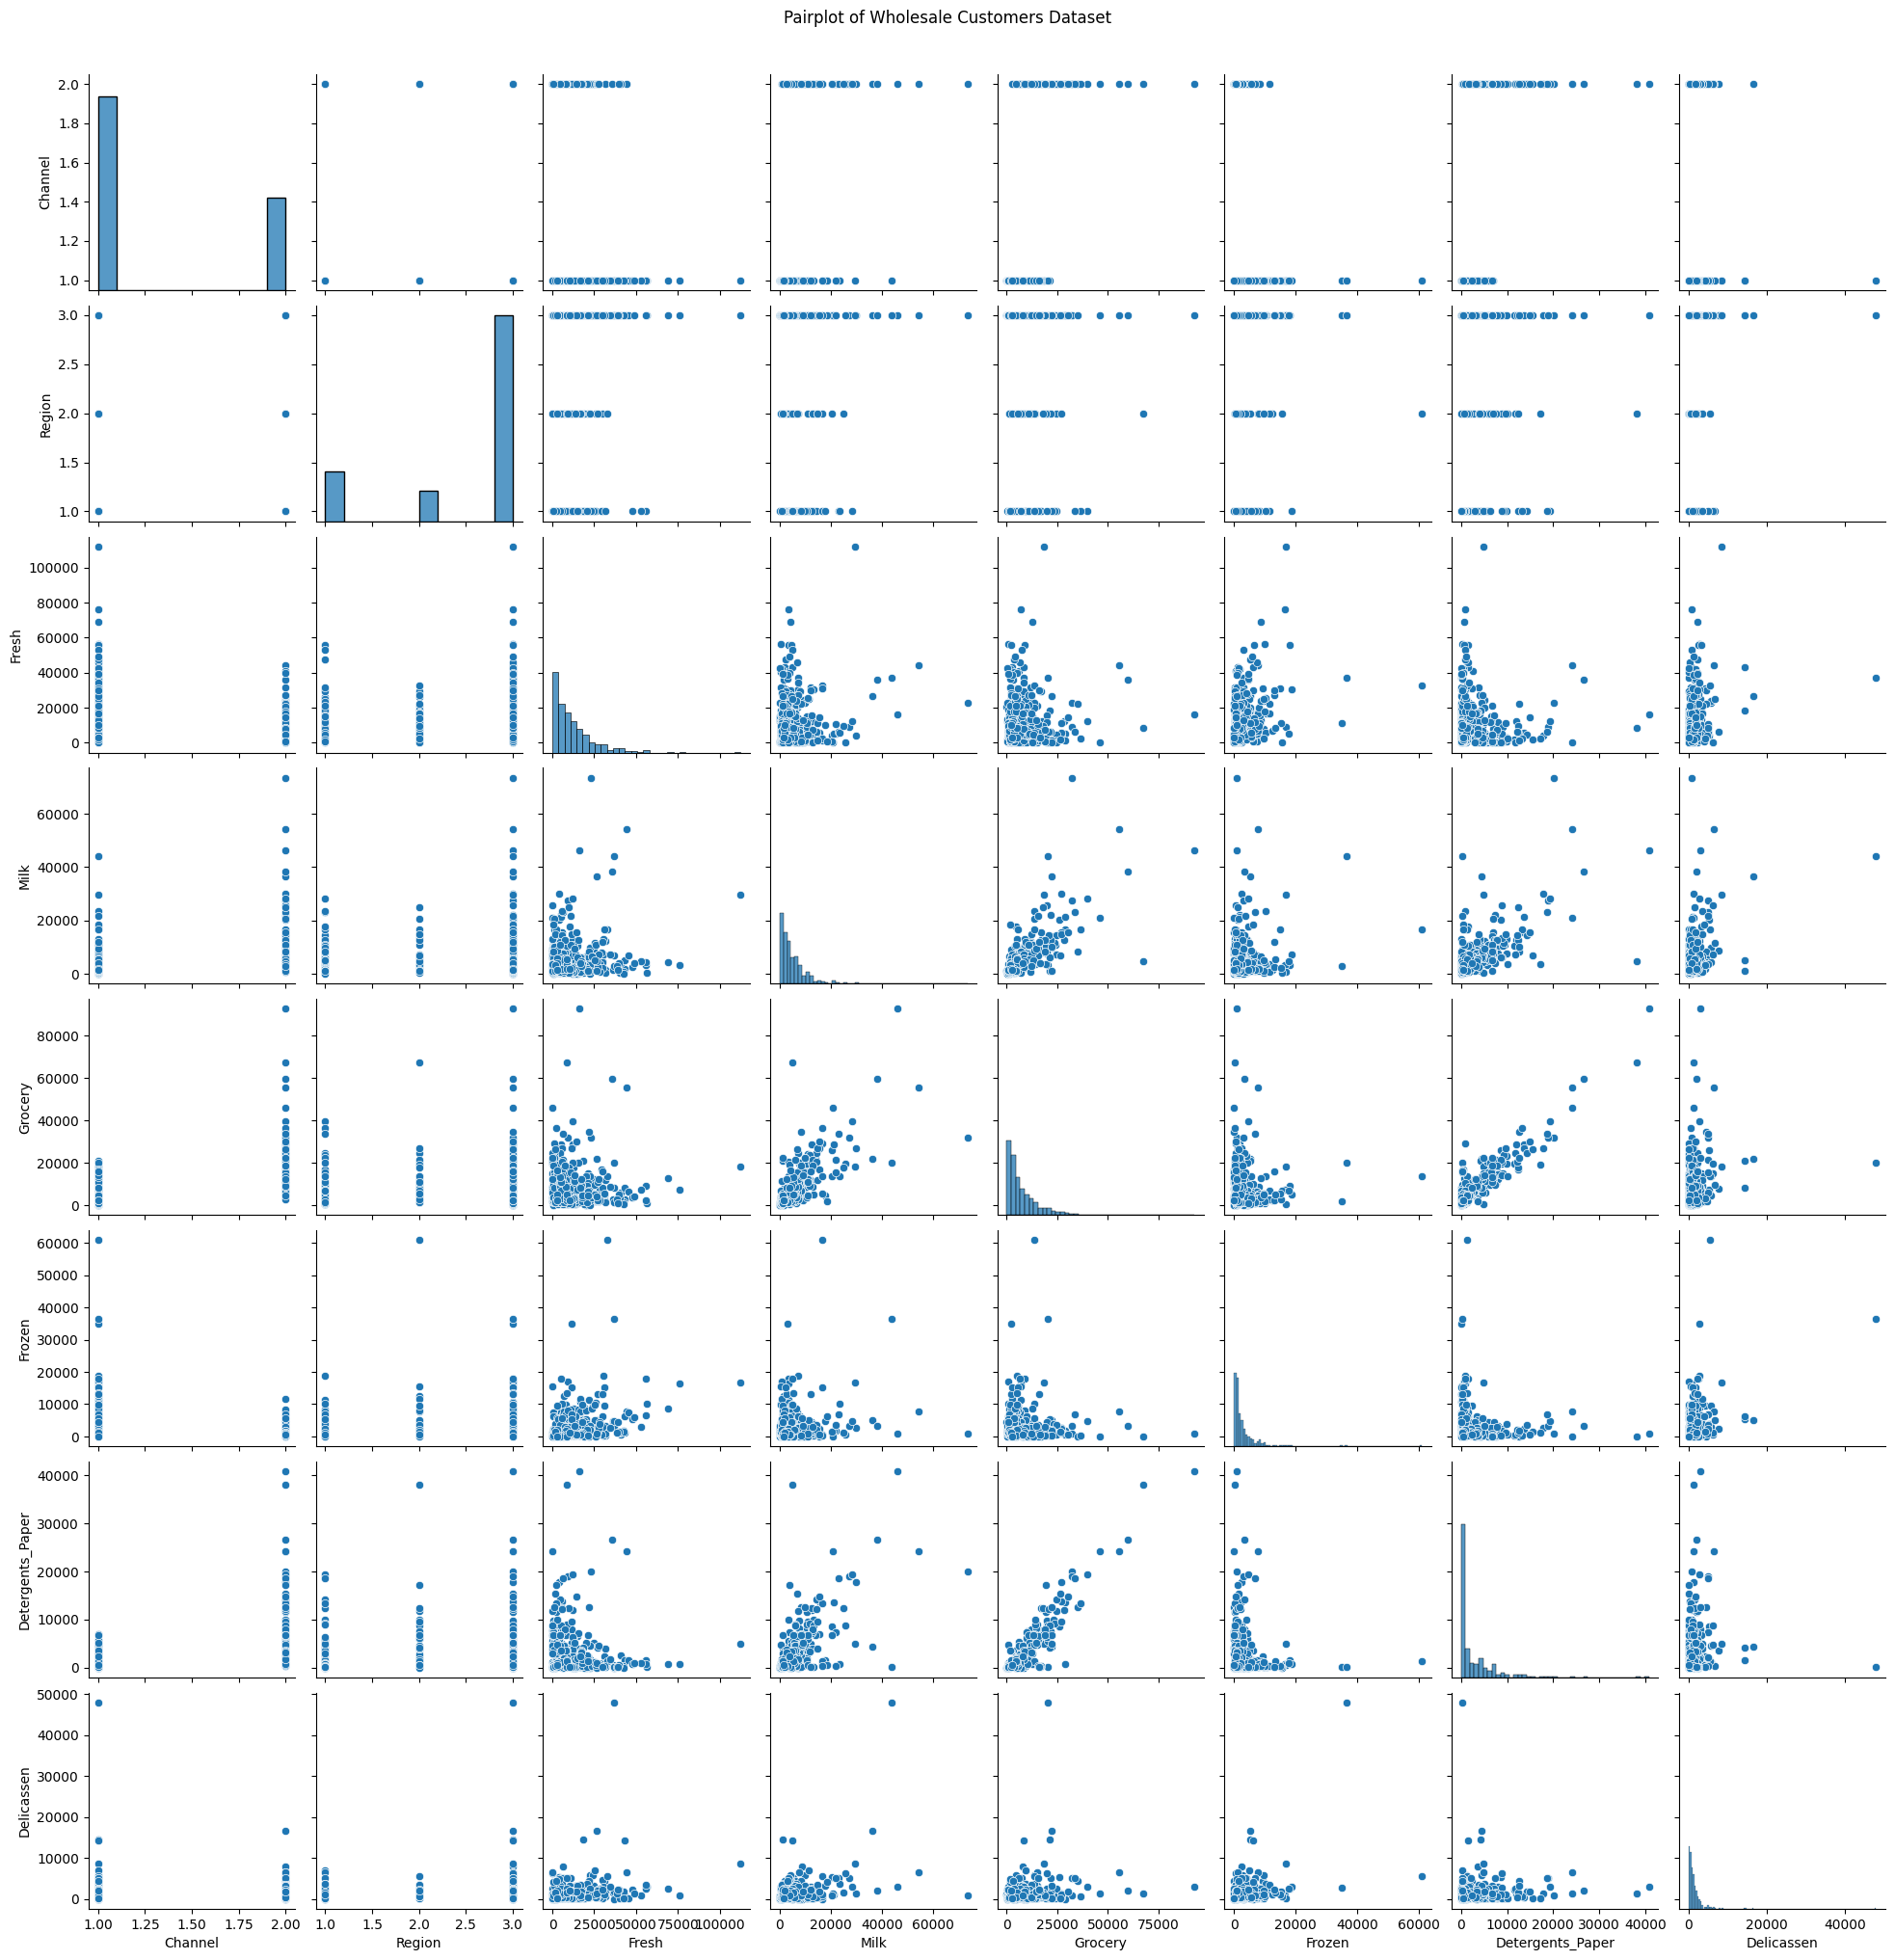

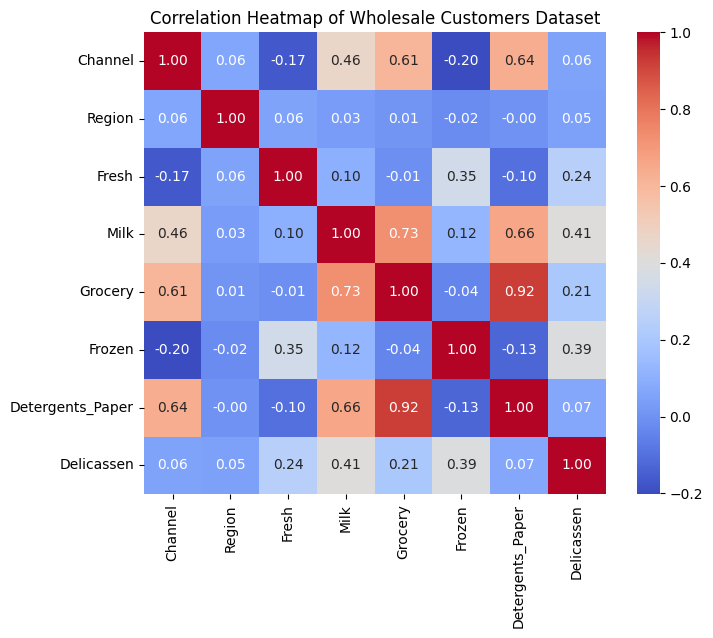

In [10]:
# Summary statistics
print(wholesale_data.describe())

# Pairplot for the Wholesale Customers dataset
sns.pairplot(wholesale_data)
plt.suptitle("Pairplot of Wholesale Customers Dataset", y=1.02)
plt.show()

# Correlation matrix for Wholesale Customers dataset
wholesale_corr = wholesale_data.corr()

# Heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(wholesale_corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Correlation Heatmap of Wholesale Customers Dataset")
plt.show()


Apply K-Means Clustering

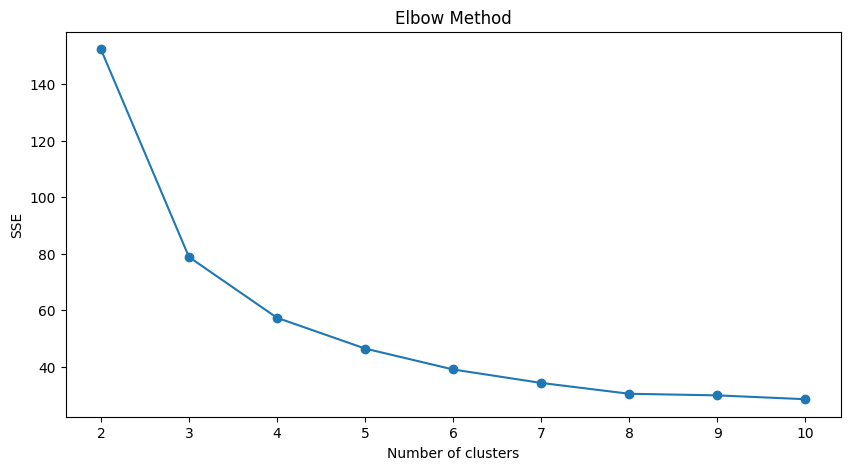

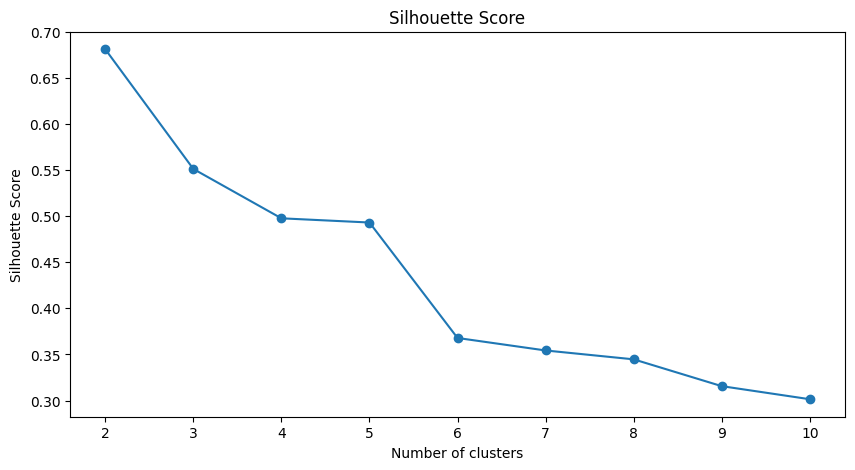

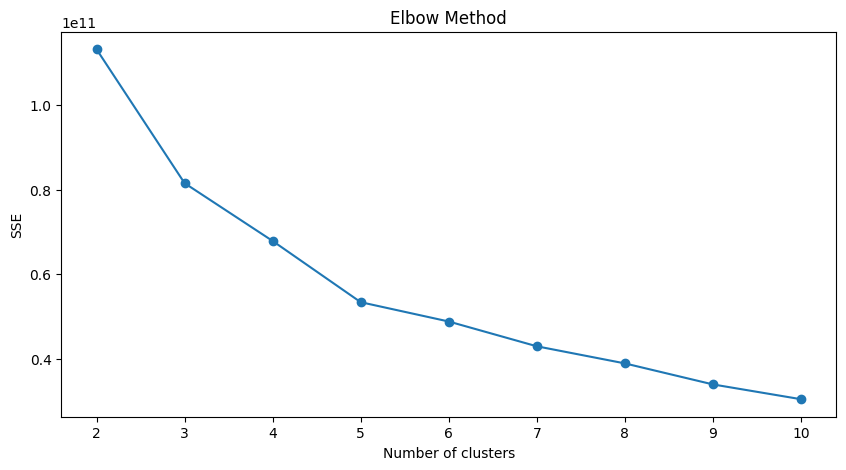

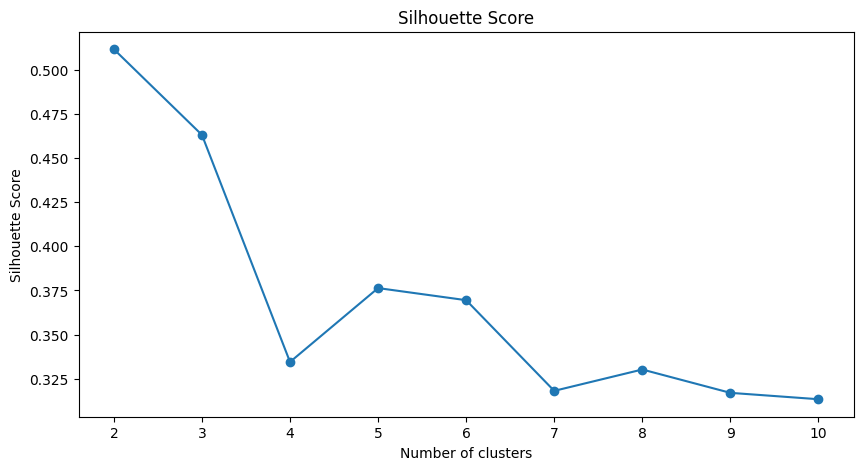

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Function to find the optimal number of clusters using the Elbow Method and Silhouette Score
def kmeans_clustering(data, max_clusters=10):
    sse = []
    silhouette_scores = []

    for k in range(2, max_clusters+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, kmeans.labels_))

    # Plotting the Elbow Method graph
    plt.figure(figsize=(10, 5))
    plt.plot(range(2, max_clusters+1), sse, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('SSE')
    plt.show()

    # Plotting the Silhouette Score graph
    plt.figure(figsize=(10, 5))
    plt.plot(range(2, max_clusters+1), silhouette_scores, marker='o')
    plt.title('Silhouette Score')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

# Applying the function to both datasets (excluding categorical columns)
kmeans_clustering(iris_data.drop(columns='variety'))
kmeans_clustering(wholesale_data.drop(columns=['Channel', 'Region']))


Hierarchical Clustering

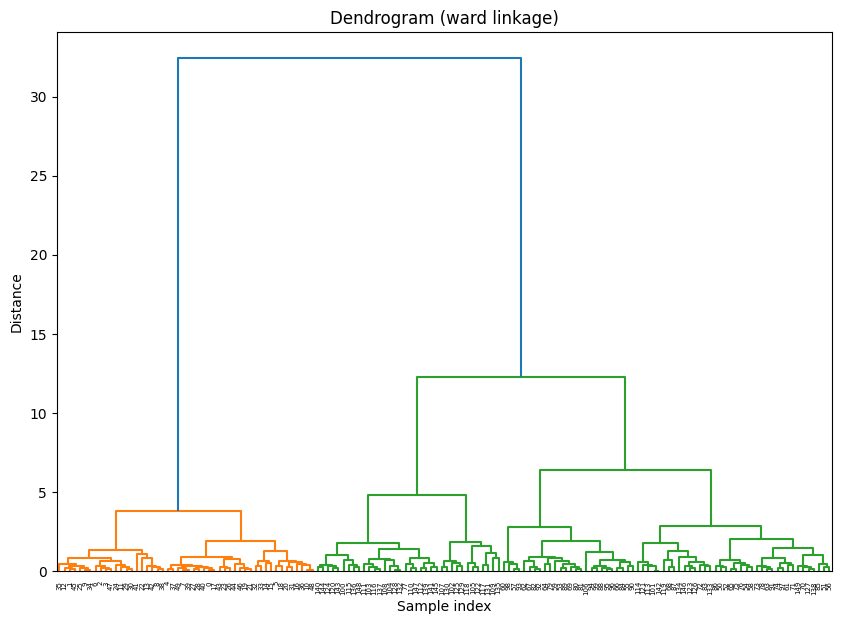

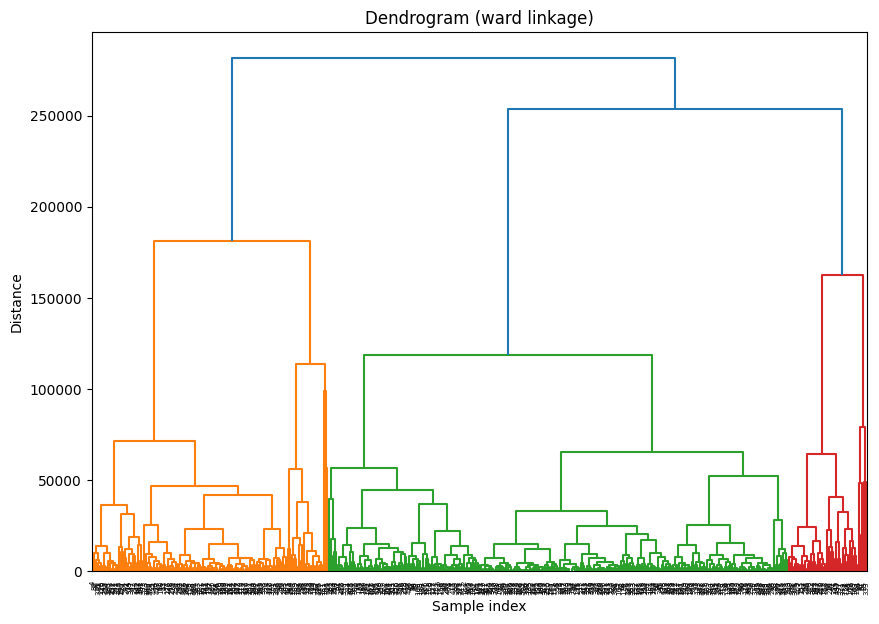

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Function to apply Hierarchical Clustering and plot dendrogram
def hierarchical_clustering(data, method='ward'):
    Z = linkage(data, method=method)
    plt.figure(figsize=(10, 7))
    dendrogram(Z)
    plt.title(f'Dendrogram ({method} linkage)')
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
    plt.show()

# Applying to both datasets
hierarchical_clustering(iris_data.drop(columns='variety'))
hierarchical_clustering(wholesale_data.drop(columns=['Channel', 'Region']))


 Visualization with PCA

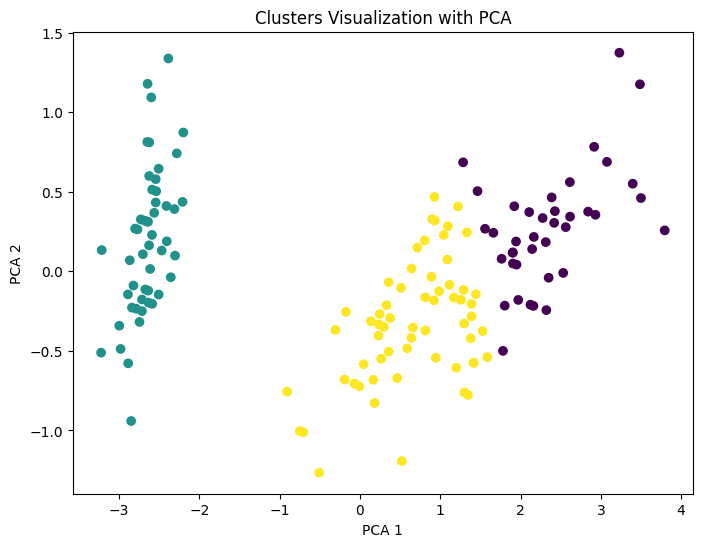

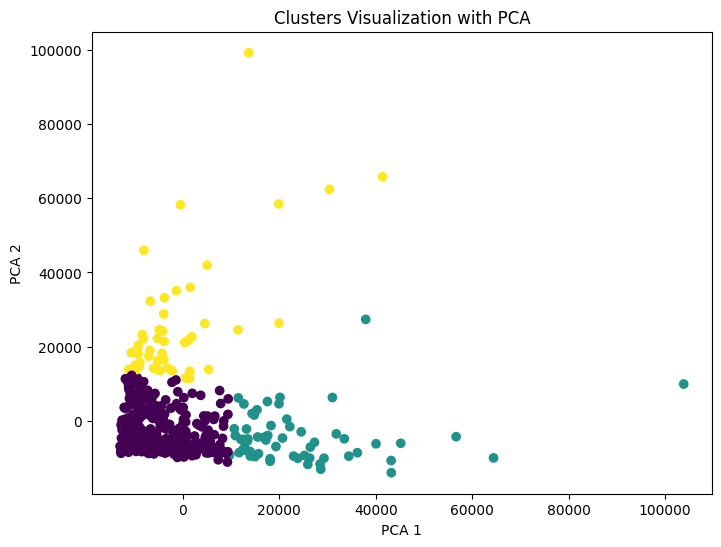

In [13]:
from sklearn.decomposition import PCA

# Function to reduce dimensions and visualize clusters
def visualize_clusters_pca(data, n_clusters):
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(reduced_data)
    labels = kmeans.labels_

    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis')
    plt.title('Clusters Visualization with PCA')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.show()

# Applying to both datasets
visualize_clusters_pca(iris_data.drop(columns='variety'), n_clusters=3)
visualize_clusters_pca(wholesale_data.drop(columns=['Channel', 'Region']), n_clusters=3)


Comparison and Reporting

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Example: Perform K-Means Clustering on the Iris dataset
kmeans_iris = KMeans(n_clusters=3, random_state=42)
iris_data['Cluster'] = kmeans_iris.fit_predict(iris_data.drop(columns='variety'))

# Calculate Silhouette Score and Davies-Bouldin Index for the Iris dataset
iris_silhouette = silhouette_score(iris_data.drop(columns=['variety', 'Cluster']), iris_data['Cluster'])
iris_davies_bouldin = davies_bouldin_score(iris_data.drop(columns=['variety', 'Cluster']), iris_data['Cluster'])

print(f'Iris Dataset - Silhouette Score: {iris_silhouette}')
print(f'Iris Dataset - Davies-Bouldin Index: {iris_davies_bouldin}')

# Example: Perform K-Means Clustering on the Wholesale dataset
kmeans_wholesale = KMeans(n_clusters=3, random_state=42)
wholesale_data['Cluster'] = kmeans_wholesale.fit_predict(wholesale_data)

# Calculate Silhouette Score and Davies-Bouldin Index for the Wholesale dataset
wholesale_silhouette = silhouette_score(wholesale_data.drop(columns='Cluster'), wholesale_data['Cluster'])
wholesale_davies_bouldin = davies_bouldin_score(wholesale_data.drop(columns='Cluster'), wholesale_data['Cluster'])

print(f'Wholesale Dataset - Silhouette Score: {wholesale_silhouette}')
print(f'Wholesale Dataset - Davies-Bouldin Index: {wholesale_davies_bouldin}')


Iris Dataset - Silhouette Score: 0.5511916046195927
Iris Dataset - Davies-Bouldin Index: 0.6660385791628493
Wholesale Dataset - Silhouette Score: 0.4630267614355114
Wholesale Dataset - Davies-Bouldin Index: 0.8905499657141548
